# Assignment 3: Ensemble Methods and Unsupervised Learning
## Applied Machine Learning (BUAN 6341)


### <font color='red'>Due Date: April 23, 2024 11:59 pm</font> 

Deliverables:

- Write down your codes in the given cells described in this file, denoted as "YOUR CODE HERE"
- Write down your discussion in the given cells, denoted as "YOUR DISCUSSION HERE"
- Submit two files: .ipynb and .html file to eLearning. Both files should include (1) Your code, and (2) the output of the code.
- There is no conceptual problem for this assignment.

The total score of the implementation part is: 100

In [2]:
NAME = "Swastik Bhatnagar"

In [3]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### The MNIST Dataset

The famous MNIST (hand-written digits) dataset contains 60,000 hand-written digit pictures (grayscale), each cut into 28 * 28 grids. It has been broadly applied to examine the performance of classification, clustering, and deep learning algorithms. The original dataset can be loaded using syntax: keras.datasets.mnist.load_data.

In this assignment, we will use a simplified version of this dataset, which contains 1797 hand-written digit pictures (grayscale), each cut in 8 * 8 grids. This simplified dataset reduces computation complexity. The simplified dataset can be loaded using: sklearn.datasets.load_digits.

Run the cell below to (1) load the data and get a brief overview of it; (2) plot some of the pictures to get an intuitive understanding; and (3) split the data.

In [4]:
# Loading Data
from sklearn.datasets import load_digits
mnist = load_digits()
print("Keys of MNIST datset:", mnist.keys())

print("Total number of records:", mnist.data.shape[0])
print("Number of features:", mnist.data.shape[1])
print("Records will be classified into these classes:", mnist.target_names)

Keys of MNIST datset: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Total number of records: 1797
Number of features: 64
Records will be classified into these classes: [0 1 2 3 4 5 6 7 8 9]


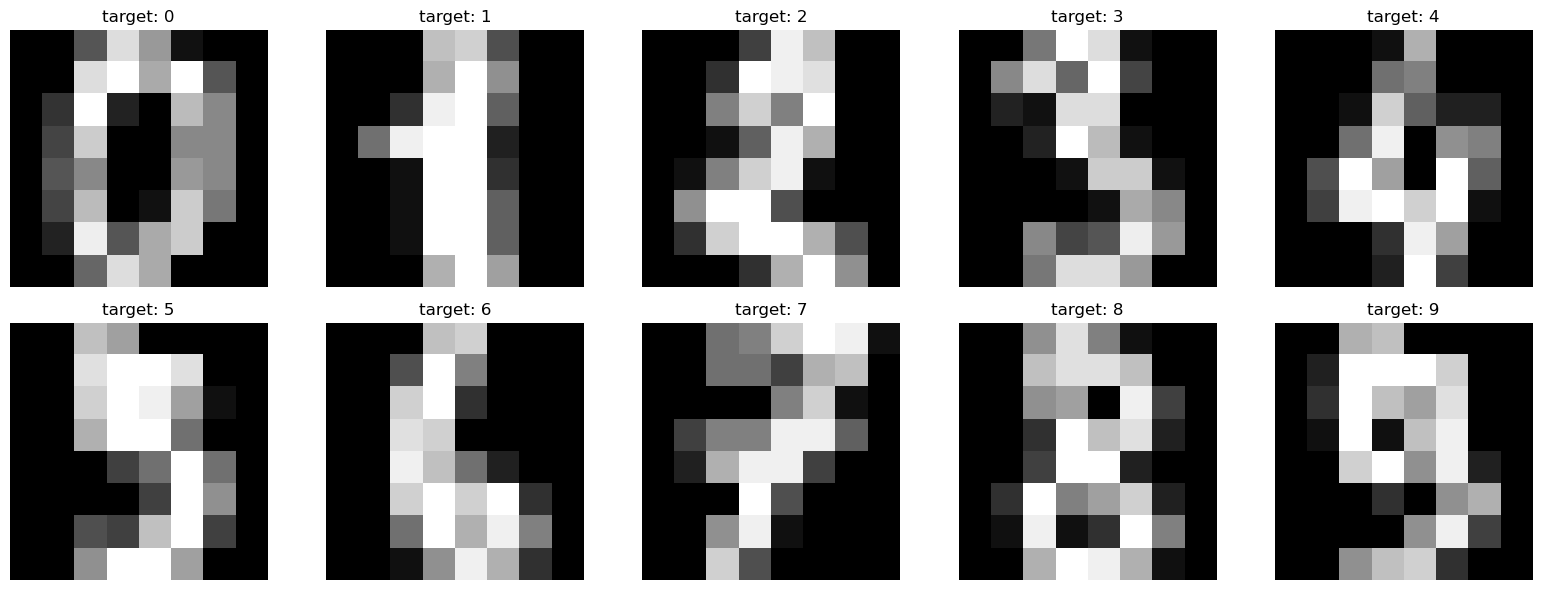

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6))
for i in range(10):
    axes[i//5, i %5].imshow(mnist.images[i], cmap='gray');
    axes[i//5, i %5].axis('off')
    axes[i//5, i %5].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

In [6]:
# Data Splitting

## Define X and y
X=mnist.data
y=mnist.target

## Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

## Section A. Ensemble Methods
In this part, we will first run some simple models, then apply ensemble methods to see the performance. You will need to train TWO simple models and THREE ensemble models. When defining the model function, please use different names (you will need to call these models again in the model evaluation part).


### Question 1. Simple Models - Decision Tree (10 points)
- Train a Decision Tree model. Set "max_depth" to 6, "min_samples_split" to 2, "max_leaf_nodes" to  10, and random_state to 0.
- Report the training and test accuracy of the decision tree model.

In [10]:
## YOUR CODE HERE (for Decision Tree Model)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Loading data
mnist = load_digits()
X = mnist.data
y = mnist.target

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

def train_decision_tree(X_train, y_train, X_test, y_test):
    dt_model = DecisionTreeClassifier(max_depth=6, min_samples_split=2, max_leaf_nodes=10, random_state=0)
    dt_model.fit(X_train, y_train)
    y_train_pred = dt_model.predict(X_train)
    y_test_pred = dt_model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return train_accuracy, test_accuracy

# Calling the function and print the results
train_accuracy, test_accuracy = train_decision_tree(X_train, y_train, X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.6622123236822569
Testing Accuracy: 0.66


### Question 2. Simple Models - Naive Bayes (10 points)
- Choose the proper Naive Bayes model and train accordingly.  
- Report the training and test accuracy of the naive bayes model.

In [12]:
# YOUR CODE HERE (for Naive Bayes Model)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def train_naive_bayes(X_train, y_train, X_test, y_test):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_train_pred = nb_model.predict(X_train)
    y_test_pred = nb_model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return train_accuracy, test_accuracy


train_accuracy, test_accuracy = train_naive_bayes(X_train, y_train, X_test, y_test)
print("Naive Bayes - Training Accuracy:", train_accuracy)
print("Naive Bayes - Testing Accuracy:", test_accuracy)



Naive Bayes - Training Accuracy: 0.8478099480326652
Naive Bayes - Testing Accuracy: 0.8355555555555556


### Question 3. Ensemble Methods - Random Forest (15 points)
- Train a random forest model. Specifically, train 200 decision trees on 1000 resampled records. For each tree, keep specifications the same as those used in Question 1 (i.e., max_depth = 6, min_samples_split = 2, etc.)
- What is the training and  test accuracy for the random forest?
- Compare the performance (test accuracy) of random forest and decision tree. What do you find? Briefly discuss the difference between decision tree and random forest, and how the difference would influence model performance.

In [13]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def train_random_forest(X_train, y_train, X_test, y_test):
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=6, min_samples_split=2, max_leaf_nodes=10, random_state=0)
    rf_model.fit(X_train, y_train)
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return train_accuracy, test_accuracy


train_accuracy, test_accuracy = train_random_forest(X_train, y_train, X_test, y_test)
print("Random Forest - Training Accuracy:", train_accuracy)
print("Random Forest - Testing Accuracy:", test_accuracy)


Random Forest - Training Accuracy: 0.9198218262806236
Random Forest - Testing Accuracy: 0.9


In [ ]:
# YOUR DISCUSSION HERE
#The decision tree model has a training accuracy of approximately 0.6621 and a test accuracy of 0.66. Comparing this to the random forest model, which has a training accuracy of about 0.9198 and a test accuracy of 0.9, the random forest significantly outperforms the decision tree. This demonstrates the effectiveness of ensemble methods like random forests in improving predictive accuracy and generalization by combining the decisions of multiple trees, thus reducing the risk of overfitting that is often seen with single decision trees.

# Question 4. Ensemble Methods - AdaBoost (15 points)
- Apply Gaussian Naive Bayes (with default settings, same as Q2) with AdaBoost. Run the Naive Bayes model 200 times. Let learning_rate = 0.3, and random_state = 0.
- Report the test accuracy of the Naive Bayes model with AdaBoost.
- Compare the performance (test accuracy) of naive bayes with and without adaboost. Briefly discuss the role of adaboost.

In [14]:
# YOUR CODE HERE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def train_adaboost_nb(X_train, y_train, X_test, y_test):
    base_nb_model = GaussianNB()
    ada_model = AdaBoostClassifier(base_estimator=base_nb_model, n_estimators=200, learning_rate=0.3, random_state=0)
    ada_model.fit(X_train, y_train)
    y_test_pred = ada_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return test_accuracy


test_accuracy = train_adaboost_nb(X_train, y_train, X_test, y_test)
print("AdaBoost with Naive Bayes - Testing Accuracy:", test_accuracy)


AdaBoost with Naive Bayes - Testing Accuracy: 0.92


In [ ]:
# YOUR DISCUSSION HERE
#The test accuracy of the Gaussian Naive Bayes classifier improved from approximately 83.55% to 92% when combined with AdaBoost. AdaBoost enhanced performance by emphasizing the more difficult case in the training dataset, leading to a better-performing ensemble model as it corrects the errors of its predecessors through multiple iterations of training.

## Section B. Clustering
The MNIST dataset can also be used for clustering practice. This case, we are not classifying a digit to its corresponding label. Instead, we assume that no digit label is known, and we are simply clustering these pictures based on their similarity.


### Question 5. Clustering Prep (10 points)
We have learned two clustering methods, K-Means and DBSCAN. Both methods require scaling before applying the model. 
- Apply MinMax Scaling to our data so that the scaled data can be used for clustering algorithms. For result consistency, use sklearn package for minmax scaling. 


In [21]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

### Question 6. K-Means Clustering (10 points)
- Apply K-Means, set k=10 (as we have already known there should be 10 digits), and random state = 0. Make sure you are using the scaled data.
- Predict the cluster labels. Name the result (i.e., cluster labels) as "labels". 

In [22]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

def apply_kmeans(X_scaled):
    kmeans = KMeans(n_clusters=10, random_state=0)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    

### Question 7 DBSCAN (20 points)
- Apply DBSCAN, set eps to 1 and min_samples to 5. Predict the cluster labels. Name the result as "temp_clusters". How many unique clusters do we have? 
- Apply DBSCAN again, let eps = 1.5 and min_samples = 5. Predict the cluster labels. Name the result as "clusters". How many unique clusters do we have now? 
- Compare the choice of eps and the number of clusters, briefly discuss the impact of eps on cluster number.
- Given that there are 10 digits, which parameter choice would you choose? eps = 1 or eps = 1.5?

In [18]:
# YOUR CODE HERE (DBSCAN with eps = 1)
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=5)
temp_clusters = dbscan.fit_predict(X_scaled)
num_clusters = len(set(temp_clusters)) - (1 if -1 in temp_clusters else 0)

print("number of clusters:", num_clusters)



number of clusters: 26


In [19]:
# YOUR CODE HERE (DBSCAN with eps = 1.5)
dbscan = DBSCAN(eps=1.5, min_samples=5)
temp_clusters = dbscan.fit_predict(X_scaled)
num_clusters = len(set(temp_clusters)) - (1 if -1 in temp_clusters else 0)

print("number of clusters:", num_clusters)


number of clusters: 9


In [15]:
# YOUR DISCUSSION HERE (Include the discussion for the last two problems here.)
#The choice of eps significantly affects the number of clusters formed. A smaller eps value tends to produce a larger number of clusters because it defines a smaller neighborhood around each point, leading to more clusters that are more tightly packed. Conversely, a larger eps encompasses a broader area around each point, causing points to be grouped into larger, but fewer clusters
#Given that the data represents 10 digits, choosing an eps value that results in a number of clusters close to 10 might be more appropriate. Hence, between eps = 1 (which gives 26 clusters) and eps = 1.5 (which gives 9 clusters), eps = 1.5 might be the better choice as it is closer to the expected number of clusters (10).

### Question 8. Performance of Clustering (Open Question, 10 Points)
Clustering is an unsupervised learning method and does not have a "ground truth" (i.e., the cluster label of each example). Thus, it is difficult to show the performance of clustering results. 

When working with pictures, one way to provide some evidence of clustering performance is to show some pictures within each cluster, and see if the clustering result makes sense. 

- The cell below plots 5 pictures for each cluster (kmeans clustering). Run the cell below to generate the plot. (Double check Q6 - the clustering result should be under the name "labels".)
- Discuss briefly about the clustering result. Does the method work well in this case? (Open Question)

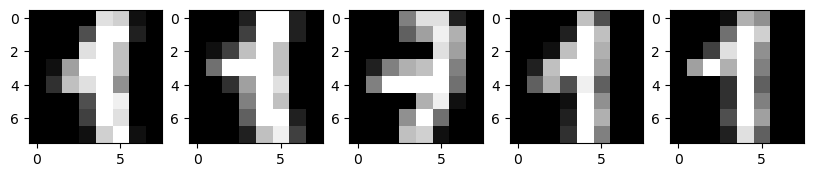

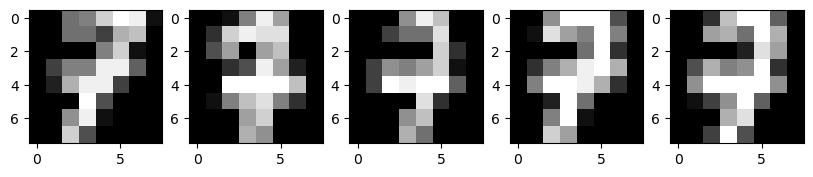

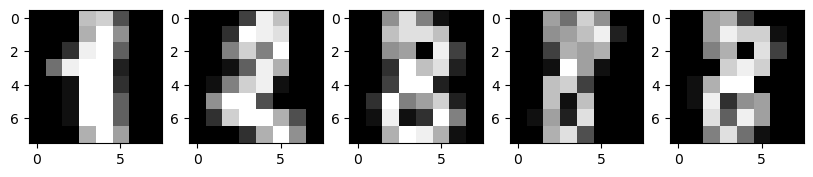

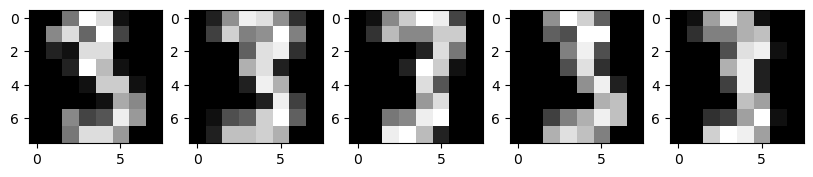

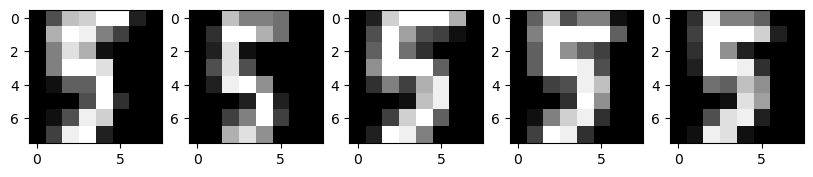

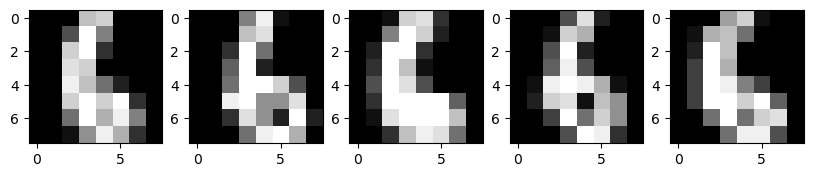

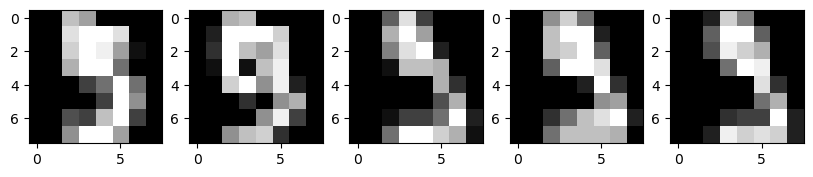

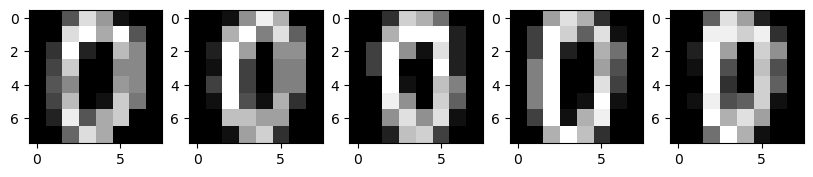

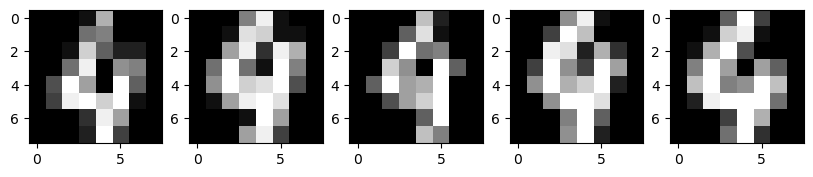

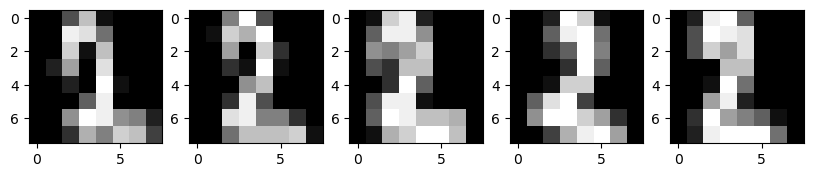

In [20]:
# RUN THIS CELL TO GET FIGURE
def draw_digit(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)
    plt.gray()

for nb in range(10):
    show_size = 5
    plt.figure(figsize=(10,10))
    count = 0

    for i in range(mnist.images.shape[0]):
        if count < show_size and labels[i] == nb:
            draw_digit(mnist.images[i].reshape(8,8), 1, show_size, count+1)
            count += 1
    plt.show()

In [ ]:
# YOUR DISCUSSION HERE
#The digits 0,2,3,4,5,6 and 7 have been successfully grouped together as they exhibit consistent patterns within each group. However, 1,8,9 share similar pixel locations with others which results in misclassification. Although K-Means clustering has proven effective in clustering some digits, there is still room for improvement.